In [293]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt 

In [294]:
H1b = pd.read_excel('H-1B_Disclosure_Data_FY2019.xlsx')

In [295]:
H1b.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,SECONDARY_ENTITY,SECONDARY_ENTITY_BUSINESS_NAME,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_SOURCE,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,APPX_A_NO_OF_EXEMPT_WORKER_1,APPX_A_NAME_OF_INSTITUTION_1,APPX_A_FIELD_OF_STUDY_1,APPX_A_DATE_OF_DEGREE_1,APPX_A_NO_OF_EXEMPT_WORKER_2,APPX_A_NAME_OF_INSTITUTION_2,APPX_A_FIELD_OF_STUDY_2,APPX_A_DATE_OF_DEGREE_2,APPX_A_NO_OF_EXEMPT_WORKER_3,APPX_A_NAME_OF_INSTITUTION_3,APPX_A_FIELD_OF_STUDY_3,APPX_A_DATE_OF_DEGREE_3,APPX_A_NO_OF_EXEMPT_WORKER_4,APPX_A_NAME_OF_INSTITUTION_4,APPX_A_FIELD_OF_STUDY_4,APPX_A_DATE_OF_DEGREE_4,APPX_A_NO_OF_EXEMPT_WORKER_5,APPX_A_NAME_OF_INSTITUTION_5,APPX_A_FIELD_OF_STUDY_5,APPX_A_DATE_OF_DEGREE_5
0,I-200-18269-520762,DENIED,2018-09-26,2018-10-01,NaT,H-1B,2018-09-26,2021-09-26,"NES GLOBAL, LLC",CANDACE ROMERO,800 GESSNER ROAD,HOUSTON,TX,77024,UNITED STATES OF AMERICA,NaN,7135514444,4503,NaN,NaN,N,NaN,NaN,NaN,GENERATOR ENGINEER,17-2071,ELECTRICAL ENGINEERS,541330.0,1,0,1,0,0,0,0,N,NaN,NaN,NaN,NaN,NaN,36.00,0.00,Hour,N,HOUSTON,TX,FL,77024,N,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I-200-18323-885516,DENIED,2018-11-19,2018-11-26,NaT,H-1B,2018-11-27,2021-11-26,UNIVERSITY OF TEXAS AT DALLAS,NaN,800 W CAMPBELL RD,RICHARDSON,TX,75080,UNITED STATES OF AMERICA,NaN,9728832111,NaN,N,NaN,N,NaN,NaN,NaN,PROGRAM SPECIALIST,19-1042,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",611310.0,1,1,0,0,0,0,0,Y,48630.00,Year,2.0,OES,NaN,50000.00,0.00,Year,N,Richardson,TX,TX,75080,N,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-200-18323-882044,DENIED,2018-11-19,2018-11-26,NaT,H-1B,2018-11-28,2021-11-27,UNIVERSITY OF TEXAS AT DALLAS,NaN,800 W CAMPBELL RD,RICHARDSON,TX,75080,UNITED STATES OF AMERICA,NaN,9728832111,NaN,N,NaN,N,NaN,NaN,NaN,ASSISTANT PROFESSOR,25-1011,"BUSINESS TEACHERS, POSTSECONDARY",611310.0,1,1,0,0,0,0,0,Y,79287.00,Year,2.0,OES,NaN,207777.00,0.00,Year,N,Richardson,Dallas,TX,75080,N,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-200-18356-858057,DENIED,2018-12-22,2018-12-27,NaT,H-1B,2019-01-01,2022-01-01,BILLY R. WINGARD,NaN,4705 EDGEWOOD DRIVE,NEW BERN,NC,28562,UNITED STATES OF AMERICA,NaN,2526375933,NaN,N,NaN,N,NaN,NaN,NaN,HOME HEALTH & PERSONAL CARE AIDE,39-9021,PERSONAL CARE AIDES,814110.0,1,1,0,0,0,0,0,Y,7.95,Hour,NaN,SURVEY,O-Net Online,7.95,7.95,Hour,N,New Bern,Craven,NC,28562,N,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-200-19081-827349,CERTIFIED,2019-03-22,2019-03-28,NaT,H-1B,2019-04-01,2022-04-01,"COATES,BRIGHT & BAY LLC",NaN,2820 PAN AMERICAN BLVD,NORTH PORT,FL,34287,UNITED STATES OF AMERICA,NaN,3703704053,NaN,N,"COATES,BRIGHT & BAY LLC",N,NaN,NaN,NaN,CARE GIVER-LIVE IN- MANAGER,31-9099,"HEALTHCARE SUPPORT WORKERS, ALL OTHER",621610.0,1,1,0,0,0,0,0,Y,8.46,Hour,1.0,OES,NaN,8.46,10.00,Hour,Y,NORTH PORT,florida,FL,34287,N,N,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
clean = H1b.dropna(axis = 1, thresh= H1b.shape[0] / 3)
clean = clean.query('VISA_CLASS == "H-1B"')
clean = clean.query('CASE_STATUS != "WITHDRAWN"')
clean.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PHONE,SECONDARY_ENTITY,SECONDARY_ENTITY_BUSINESS_NAME,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_SOURCE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B
0,I-200-18269-520762,DENIED,2018-09-26,2018-10-01,H-1B,2018-09-26,2021-09-26,"NES GLOBAL, LLC",800 GESSNER ROAD,HOUSTON,TX,77024,UNITED STATES OF AMERICA,7135514444,NaN,NaN,N,NaN,NaN,NaN,GENERATOR ENGINEER,17-2071,ELECTRICAL ENGINEERS,541330.0,1,0,1,0,0,0,0,N,NaN,NaN,NaN,NaN,36.00,0.00,Hour,N,HOUSTON,TX,FL,77024,N,NaN
1,I-200-18323-885516,DENIED,2018-11-19,2018-11-26,H-1B,2018-11-27,2021-11-26,UNIVERSITY OF TEXAS AT DALLAS,800 W CAMPBELL RD,RICHARDSON,TX,75080,UNITED STATES OF AMERICA,9728832111,N,NaN,N,NaN,NaN,NaN,PROGRAM SPECIALIST,19-1042,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",611310.0,1,1,0,0,0,0,0,Y,48630.00,Year,2.0,OES,50000.00,0.00,Year,N,Richardson,TX,TX,75080,N,NaN
2,I-200-18323-882044,DENIED,2018-11-19,2018-11-26,H-1B,2018-11-28,2021-11-27,UNIVERSITY OF TEXAS AT DALLAS,800 W CAMPBELL RD,RICHARDSON,TX,75080,UNITED STATES OF AMERICA,9728832111,N,NaN,N,NaN,NaN,NaN,ASSISTANT PROFESSOR,25-1011,"BUSINESS TEACHERS, POSTSECONDARY",611310.0,1,1,0,0,0,0,0,Y,79287.00,Year,2.0,OES,207777.00,0.00,Year,N,Richardson,Dallas,TX,75080,N,NaN
3,I-200-18356-858057,DENIED,2018-12-22,2018-12-27,H-1B,2019-01-01,2022-01-01,BILLY R. WINGARD,4705 EDGEWOOD DRIVE,NEW BERN,NC,28562,UNITED STATES OF AMERICA,2526375933,N,NaN,N,NaN,NaN,NaN,HOME HEALTH & PERSONAL CARE AIDE,39-9021,PERSONAL CARE AIDES,814110.0,1,1,0,0,0,0,0,Y,7.95,Hour,NaN,SURVEY,7.95,7.95,Hour,N,New Bern,Craven,NC,28562,N,NaN
4,I-200-19081-827349,CERTIFIED,2019-03-22,2019-03-28,H-1B,2019-04-01,2022-04-01,"COATES,BRIGHT & BAY LLC",2820 PAN AMERICAN BLVD,NORTH PORT,FL,34287,UNITED STATES OF AMERICA,3703704053,N,"COATES,BRIGHT & BAY LLC",N,NaN,NaN,NaN,CARE GIVER-LIVE IN- MANAGER,31-9099,"HEALTHCARE SUPPORT WORKERS, ALL OTHER",621610.0,1,1,0,0,0,0,0,Y,8.46,Hour,1.0,OES,8.46,10.00,Hour,Y,NORTH PORT,florida,FL,34287,N,N


In [343]:
useful = ['CASE_STATUS', 
          'EMPLOYMENT_START_DATE', 
          'EMPLOYMENT_END_DATE', 
          'EMPLOYER_NAME', 
          'AGENT_ATTORNEY_NAME',
          'AGENT_ATTORNEY_CITY',
          'AGENT_ATTORNEY_STATE',
          'AGENT_REPRESENTING_EMPLOYER',
          'JOB_TITLE',
          'SOC_CODE', 
          'SOC_NAME', 
          'FULL_TIME_POSITION', 
          'H1B_DEPENDENT', 
          'WORKSITE_CITY',
         'WORKSITE_COUNTY', 
          'CONTINUED_EMPLOYMENT', 
          'AMENDED_PETITION', 
          'PREVAILING_WAGE', 
          'WAGE_RATE_OF_PAY_FROM',
         'WAGE_RATE_OF_PAY_TO', 
          'EMPLOYER_CITY']

In [344]:
clean = clean[useful]
len(clean[clean.CASE_STATUS == 'CERTIFIED'])/len(clean)

0.9276216665052543

In [345]:
# cleaning 'EMPLOYER_NAME'
import re
clean['EMPLOYER_NAME'] = [re.sub('[.!?\\-, ]', '', str(x) ) for x in clean['EMPLOYER_NAME']]

In [346]:
clean['SOC_DIGITS'] = [str(x)[:2] for x in H1B_final.SOC_CODE]
# splitting data based on 'H1B_DEPENDENT'
h1b_dep = clean[clean.H1B_DEPENDENT == 'Y']
h1b_ndep = clean[clean.H1B_DEPENDENT == 'N']

ValueError: Length of values does not match length of index

In [ ]:
# summary statistics of numerical variables
h1b_ndep.describe()

In [ ]:
# summary statistics of numerical variables
h1b_dep.describe()

In [ ]:
# investigating how prevailing wage is affected by a company's H1B dependence status
import statsmodels.formula.api as smf

results = smf.glm('PREVAILING_WAGE ~ C(H1B_DEPENDENT)', data=clean).fit()
temp = results.summary()

We see that employer's H1B dependence

## Industries that receive H1B applications, grouped by their employer's H1B Dependence 

In [ ]:
h1b_dep_counts = h1b_dep.groupby('SOC_DIGITS')['SOC_DIGITS'].count().sort_values(ascending = False)

In [ ]:
# proportion of applications for each SOC_CODE attributed to D/ND H1B dependence status.

h1b_ndep_counts = h1b_ndep.groupby('SOC_DIGITS')['SOC_DIGITS'].count().sort_values(ascending = False)

todf = {'D':h1b_dep_counts, 'ND':h1b_ndep_counts}
df = pd.DataFrame(todf)
df[df.isnull()] = 0

summed = df.cumsum(axis=0)
df.D = df.D/summed.iloc[len(summed)-1,0]
df.ND = df.ND/summed.iloc[len(summed)-1,1]
print(df)

From this table, we can see that for all applications submitted by H1B dependent companies, most (93.1%) were for jobs classified under SOC (Standard Occupational Classification) code 15, or "Computer and Mathematical Occupation". The majority of applications submitted by companies that are not H1B dependent were also for jobs that fall under this SOC code, though the percentage of which is significantly smaller (56.9%).

## SOC_CODES, divided by H1B_DEPENDENCE

In [ ]:
prop_apps = clean.groupby(['H1B_DEPENDENT','SOC_DIGITS']).size().reset_index().sort_values(by=['H1B_DEPENDENT',0]).pivot(index='H1B_DEPENDENT',columns = 'SOC_DIGITS',values=0)
prop_apps[prop_apps.isnull()]=0
prop_apps

In [ ]:
apps_per_employer = H1B_final.groupby('EMPLOYER_NAME').size().sort_values(ascending = False)

In [ ]:
plt.hist(apps_per_employer[apps_per_employer > 500], bins = 100)
plt.ylabel('Count')
plt.xlabel('Number of Applications')
plt.title('Number of Applications Employers Tend to Submit')
plt.show()

# Biggest H1B Dependent Companies
(Assuming that the number of H1B applications submitted is some indication of the size of the company)

In [366]:
h1b_apps = clean.groupby('EMPLOYER_NAME')['CASE_STATUS'].count().sort_values(ascending=False)
h1b_apps

EMPLOYER_NAME
COGNIZANTTECHNOLOGYSOLUTIONSUSCORP                         28126
INFOSYSLIMITED                                             21404
TATACONSULTANCYSERVICESLIMITED                             11842
GOOGLELLC                                                   9564
ERNST&YOUNGUSLLP                                            8769
CAPGEMINIAMERICAINC                                         8309
DELOITTECONSULTINGLLP                                       7621
AMAZONCOMSERVICESINC                                        7174
MICROSOFTCORPORATION                                        5889
ACCENTURELLP                                                5584
HCLAMERICAINC                                               4641
IBMCORPORATION                                              4272
WIPROLIMITED                                                4187
TECHMAHINDRA(AMERICAS)INC                                   4080
LARSEN&TOUBROINFOTECHLIMITED                                3579
FACEBOOKINC

## Number of applications, visualized

In [ ]:
plt.hist(h1b_apps[h1b_apps > 500], bins = 100)
plt.ylabel('Count')
plt.xlabel('Number of Applications')
plt.title('Number of Applications Employers Tend to Submit')
plt.show()

In [ ]:
h1b_apps_n = h1b_ndep.groupby('EMPLOYER_NAME').size().sort_values(ascending = False)

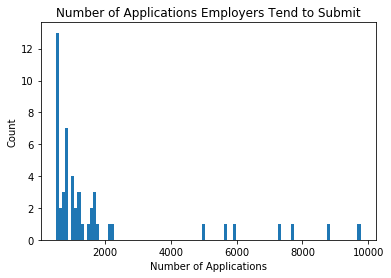

In [347]:
plt.hist(h1b_apps_n[h1b_apps_n > 500] , bins = 100)
plt.ylabel('Count')
plt.xlabel('Number of Applications')
plt.title('Number of Applications Employers Tend to Submit')
plt.show()

# Cases By Zipcode


In [348]:
clean['ZIP_FIRST_DIGIT'] = [str(x)[:1]for x in clean.WORKSITE_POSTAL_CODE]
cases_by_zip = clean[[x.isnumeric() for x in clean.ZIP_FIRST_DIGIT]].groupby('ZIP_FIRST_DIGIT')['CASE_NUMBER'].count().sort_values()
tot = sum(cases_by_zip)
cases_by_zip

AttributeError: 'DataFrame' object has no attribute 'WORKSITE_POSTAL_CODE'

# Times

In [349]:
clean_copy = clean
clean_copy['TTD'] = clean_copy.DECISION_DATE-clean_copy.CASE_SUBMITTED
temp = clean_copy['TTD'].apply(lambda x: str(x))
clean_copy['TTD'] = temp.apply(lambda x: int(x[:x.index(' ')]))

AttributeError: 'DataFrame' object has no attribute 'DECISION_DATE'

In [350]:
clean_copy.groupby('CASE_STATUS')['TTD'].mean()

KeyError: 'Column not found: TTD'

In [351]:
clean_copy = clean
clean_copy['TTR'] = clean_copy.EMPLOYMENT_END_DATE-clean_copy.EMPLOYMENT_START_DATE
temp = clean_copy['TTR'].apply(lambda x: str(x))
clean_copy['TTR'] = temp.apply(lambda x: int(x[:x.index(' ')]))

In [352]:
clean_copy.groupby('CASE_STATUS')['TTR'].mean()

CASE_STATUS
CERTIFIED              1068.368572
CERTIFIED-WITHDRAWN    1054.315051
DENIED                 1029.950058
Name: TTR, dtype: float64

In [353]:
clean_copy['TTR'].mean()

1067.1515629738178

# Investigating 'AGENT_ATTORNEY_NAME'

In [354]:
# investigating how often a particular employer will use an agent/attorney
cases_agent_employer = clean.groupby('EMPLOYER_NAME')['AGENT_REPRESENTING_EMPLOYER'].count()
tot_cases_employer = clean.groupby('EMPLOYER_NAME')['EMPLOYER_NAME'].count()
legal_assistance = cases_agent_employer/tot_cases_employer

In [355]:
# percentage of cases w/ legal assistance, for companies that have received > 100 cases. 
legal_assistance[legal_assistance != 0].sort_values(ascending = True)

legal_big_comps = cases_agent_employer[tot_cases_employer > 100]/tot_cases_employer[tot_cases_employer > 100]

legal_big_comps.sort_values(ascending = True)



EMPLOYER_NAME
GOOGLEINC                                                 0.007299
MARVELLTECHLLC                                            0.049793
SMARTITFRAMELLC                                           0.081481
YANASOFTWAREINC                                           0.220149
IBLESOFTINCDUNS#791327054                                 0.262376
MHKTECHINC                                                0.319149
UNICORNTECHNOLOGIESLLC                                    0.325000
EDISQUAREINC                                              0.371951
UNIVERSITYOFWISCONSINMADISON                              0.373832
RELIANCEGLOBALSERVICESINC                                 0.375000
KJINFOLLC                                                 0.376812
NOVOPROSOINC                                              0.413793
IPOLARITYLLC                                              0.426230
ETEKITSERVICESINC                                         0.456954
KRONSYSINC                                      

In [356]:
# some plots
legal_big_comps[legal_big_comps.isnull()] = 0
legal_big_comps2 = legal_big_comps.reset_index()
legal_big_comps_temp = legal_big_comps2.sort_values(0,ascending = True).head(100).sort_values(0, ascending = True)

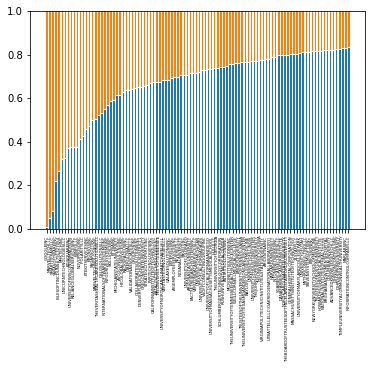

In [357]:
#companies that hire legal assistance the least
legal_big_comps_temp = legal_big_comps2.sort_values(0,ascending = True).head(100).sort_values(0, ascending = True)
plt.bar(legal_big_comps_temp['EMPLOYER_NAME'], legal_big_comps_temp[0], edgecolor='white')
plt.bar(legal_big_comps_temp['EMPLOYER_NAME'], 1-legal_big_comps_temp[0], bottom =  legal_big_comps_temp[0], edgecolor='white')
plt.ylim(0,1)
plt.xticks(rotation = 90, fontsize = 4)
plt.show()

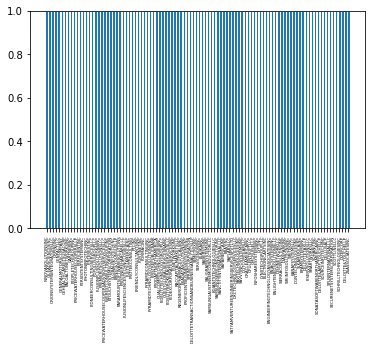

In [358]:
#companies that hire legal assistance the most
legal_big_comps_temp = legal_big_comps2.sort_values(0,ascending = True).tail(100).sort_values(0, ascending = True)
plt.bar(legal_big_comps_temp['EMPLOYER_NAME'], legal_big_comps_temp[0], edgecolor='white')
plt.ylim(0,1)
plt.xticks(rotation = 90, fontsize = 4)
plt.show()

/Users/waveley/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


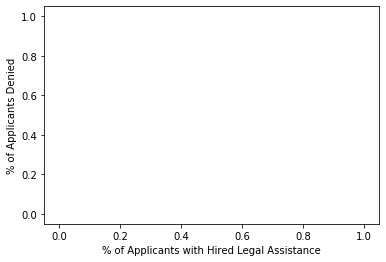

In [359]:
# visualizing prop denied vs percentage of cases w/ hired agents
to_plot = pd.concat([legal_big_comps*100, big_comps*100], axis = 1, ignore_index = True).reset_index()
new_plot = to_plot.drop(columns = ['index'])

plt.scatter(new_plot[0],new_plot[1])
plt.xlabel('% of Applicants with Hired Legal Assistance')
plt.ylabel('% of Applicants Denied')
plt.title('')
plt.show()

In [360]:
# google and marvell case study
google = clean[(clean.EMPLOYER_NAME == 'GOOGLEINC')]
#google.groupby('CASE_STATUS').count()

marvell = clean[(clean.EMPLOYER_NAME == 'MARVELLTECHLLC')]
#marvell.groupby('CASE_STATUS').count()


In [361]:
agent_rep = clean.AGENT_REPRESENTING_EMPLOYER

In [362]:
# prop of companies without attorneys
no_agent = agent_rep[agent_rep.isnull()].append(agent_rep[agent_rep == 'N'])
len(no_agent)/len(agent_rep)

0.3255548481639483

In [363]:
# counting number of different attorneys used by employers
attorney = clean[clean.AGENT_REPRESENTING_EMPLOYER == 'Y'].groupby(['EMPLOYER_NAME'])
attorney['AGENT_ATTORNEY_NAME'].nunique().sort_values(ascending = False)

EMPLOYER_NAME
GOOGLELLC                                                     26
AMAZONCOMSERVICESINC                                          26
ELECTRICPOWERRESEARCHINSTITUTEINC                             24
SALESFORCECOMINC                                              23
WILSONSONSINIGOODRICH&ROSATIPC                                21
ERNST&YOUNGUSLLP                                              20
A2ZDEVELOPMENTCENTERINC                                       19
AMAZONWEBSERVICESINC                                          19
PAYPALINC                                                     18
DELOITTECONSULTINGLLP                                         18
WAYMOLLC                                                      17
EBAYINC                                                       17
GOLDMANSACHSSERVICESLLC                                       17
GOLDMANSACHS&COLLC                                            15
JPMORGANCHASE&CO                                              14
VERILYLIFES

# Count of Cities

In [364]:
# investigating popular cities
clean.groupby('EMPLOYER_CITY')['CASE_STATUS'].count().sort_values(ascending = False).head(10)

EMPLOYER_CITY
COLLEGE STATION    28884
NEW YORK           28480
CHICAGO            23068
RICHARDSON         22481
SAN FRANCISCO      14120
MOUNTAIN VIEW      13176
ROCKVILLE          12966
SEATTLE            12553
EDISON             12394
PHILADELPHIA       12363
Name: CASE_STATUS, dtype: int64

# Count of SOC_NAME

In [365]:
# investigating popular jobs/SOC titles
clean.groupby('SOC_NAME')['CASE_STATUS'].count().sort_values(ascending = False).head(10)

SOC_NAME
SOFTWARE DEVELOPERS, APPLICATIONS        208489
COMPUTER OCCUPATIONS, ALL OTHER           54486
COMPUTER SYSTEMS ANALYST                  40568
COMPUTER SYSTEMS ANALYSTS                 30615
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     30580
COMPUTER PROGRAMMERS                      16439
OPERATIONS RESEARCH ANALYSTS              11388
MECHANICAL ENGINEERS                      11161
ACCOUNTANTS AND AUDITORS                  10282
MANAGEMENT ANALYSTS                        9521
Name: CASE_STATUS, dtype: int64